In [14]:
import os
# os.system("pip install tensorflow")
# os.system("pip install kagglehub")


In [ ]:
# os.system("pip install scipy")

In [27]:
os.system("pip install scikit-learn")

0

In [29]:
os.system("pip install seaborn")

0

In [16]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

from PIL import Image
print(Image.__file__)

c:\Users\sethb\OneDrive\Desktop\CS 383\.venv\Lib\site-packages\PIL\Image.py


In [17]:
# Importing from example code
from glob import glob
import tensorflow as tf
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

# Getting kaggle path
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)



# Set image size and paths
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
train_dir = 'kaggle/seg_train/seg_train'
test_dir = 'kaggle/seg_test/seg_test'


Path to dataset files: C:\Users\sethb\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2


In [18]:
# Classes you want to include
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea']

In [19]:
# Checking what is in the folders we care about
for folder in os.listdir(train_dir):
  if folder in class_names:
    files = glob(pathname= str(train_dir + '/' + folder + '/*.jpg'))
    print(f'Found {len(files)} in folder {folder}')

Found 2191 in folder buildings
Found 2271 in folder forest
Found 2404 in folder glacier
Found 2512 in folder mountain
Found 2274 in folder sea


In [20]:
# Data Augmentation and Normalization
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=20,
zoom_range=0.1,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.1,
horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load train and test data (excluding 'street')
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=IMAGE_SIZE,
batch_size=BATCH_SIZE,
classes=class_names,
class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=IMAGE_SIZE,
batch_size=BATCH_SIZE,
classes=class_names,
class_mode='categorical'
)

Found 11652 images belonging to 5 classes.
Found 2499 images belonging to 5 classes.


In [21]:
# Load base VGG16 model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False # Freeze base

In [22]:
# Add custom layers
model = models.Sequential([
base_model,
layers.Flatten(),
layers.Dense(256, activation='relu'),
layers.Dropout(0.5),
layers.Dense(len(class_names), activation='softmax')
])

In [23]:
# Compile the model
model.compile(
optimizer=optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['accuracy']
)

In [24]:

# Train the model
# Add callbacks to stop if no improvement
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
monitor='val_loss',
patience=3, # stop after 3 epochs of no improvement
restore_best_weights=True
)

In [25]:
# Fit with early stopping
history = model.fit(
    train_generator,
    epochs=15, # set a high number but let early stopping cut it off
    validation_data=test_generator,
    callbacks=[early_stop]
)

c:\Users\sethb\OneDrive\Desktop\CS 383\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.7296 - loss: 0.7312

c:\Users\sethb\OneDrive\Desktop\CS 383\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


365/365 ━━━━━━━━━━━━━━━━━━━━ 325s 889ms/step - accuracy: 0.7298 - loss: 0.7307 - val_accuracy: 0.8695 - val_loss: 0.3437
Epoch 2/15
365/365 ━━━━━━━━━━━━━━━━━━━━ 250s 684ms/step - accuracy: 0.8362 - loss: 0.4340 - val_accuracy: 0.8695 - val_loss: 0.3371
Epoch 3/15
365/365 ━━━━━━━━━━━━━━━━━━━━ 231s 633ms/step - accuracy: 0.8435 - loss: 0.4183 - val_accuracy: 0.8671 - val_loss: 0.3479
Epoch 4/15
365/365 ━━━━━━━━━━━━━━━━━━━━ 481s 1s/step - accuracy: 0.8518 - loss: 0.3920 - val_accuracy: 0.8715 - val_loss: 0.3367
Epoch 5/15
365/365 ━━━━━━━━━━━━━━━━━━━━ 232s 634ms/step - accuracy: 0.8472 - loss: 0.4032 - val_accuracy: 0.8723 - val_loss: 0.3438
Epoch 6/15
365/365 ━━━━━━━━━━━━━━━━━━━━ 233s 640ms/step - accuracy: 0.8653 - loss: 0.3520 - val_accuracy: 0.8836 - val_loss: 0.3106
Epoch 7/15
365/365 ━━━━━━━━━━━━━━━━━━━━ 235s 643ms/step - accuracy: 0.8619 - loss: 0.3670 - val_accuracy: 0.8804 - val_loss: 0.3149
Epoch 8/15
365/365 ━━━━━━━━━━━━━━━━━━━━ 232s 636ms/step - accuracy: 0.8659 - loss: 0.3510 

In [28]:
import numpy as np
from sklearn.metrics import classification_report

# Get true labels and predictions
Y_predictions = model.predict(test_generator)
y_pred = np.argmax(Y_predictions, axis=1)

# True labels
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(true_labels, y_pred, target_names=class_labels))

79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 487ms/step
              precision    recall  f1-score   support

   buildings       0.18      0.19      0.19       437
      forest       0.19      0.18      0.18       474
     glacier       0.19      0.20      0.20       553
    mountain       0.21      0.21      0.21       525
         sea       0.17      0.16      0.16       510

    accuracy                           0.19      2499
   macro avg       0.19      0.19      0.19      2499
weighted avg       0.19      0.19      0.19      2499



<Axes: >

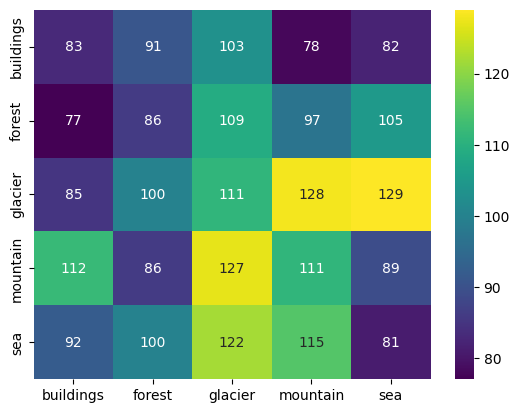

In [30]:
# Prediction heat map
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get true labels and predictions
sns.heatmap(confusion_matrix(true_labels, y_pred),
            annot=True,
            fmt='.3g',
            xticklabels = class_labels,
            yticklabels = class_labels,
            cmap='viridis')

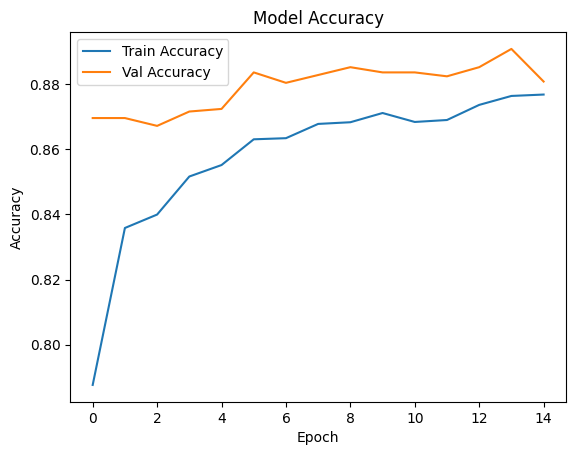

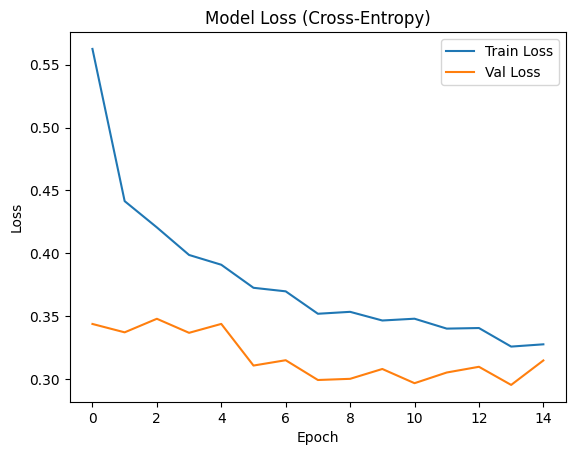

In [31]:

# Plotting accuracy and loss over the course of training
import matplotlib.pyplot as plt


# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss (Cross-Entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('vgg16_1epoch_keras.keras')